Tâche 7 : xrd.ipynb

Loudeche Maxime.

Ce notebook permet de télécharger le fichier .CIF du matériaux "mp-1023936" : WSe2. Il permet également de déterminer les 3 premiers pics du diffractogramme correspondant à notre cristal et de précisier les indices hkl associés. Dans cette partie, nous allons nous intéresser aux pics du diffractogramme pour un rayonnement X incident CuKα de longueur d’onde λ=1.54060 Angstrom sur le matériaux WSe2.

A partir de l'image de diffraction obtenue, il est possible, sous certaines réserves de déterminer la position de tous les atomes de la structure.

Nous considèrerons $2\theta$ comme l'angle entre la direction d'incidence et celle d'observation :

<p>
    <img src="xrd_img1.png" />
</p>   

In [2]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from matplotlib import pyplot as plt
import numpy as np
with MPRester("1UZlSnaTONTXfpKB") as m:
    structure = m.get_structure_by_material_id("mp-1023936")
    w = CifWriter(structure)
    w.write_file("mp-1023936_struture.cif")

Nous nous concentrons, comme demandé, uniquement sur les 3 premiers pics :

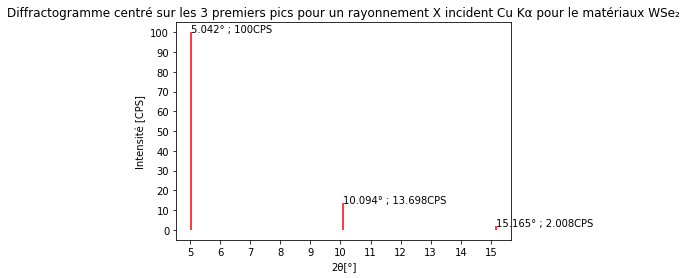

In [23]:
# Paramètres du graphe
plt.title("Diffractogramme centré sur les 3 premiers pics pour un rayonnement X incident Cu K\u03B1 pour le matériaux WSe\u2082")
plt.xlabel('2\u03B8[\u00b0]')
plt.xticks(np.arange(5, 16, 1))
plt.ylabel('Intensité [CPS]')
plt.yticks(np.arange(0, 101, 10))

# Les points à plot
angle = [5.042, 10.094, 15.165] 
amplitude = [100, 13.698, 2.008]
origine = [0, 0, 0, 0]

# Le plot :
plt.vlines(angle, origine, amplitude, color='red')
plt.text(angle[0], amplitude[0], '5.042° ; 100CPS')
plt.text(angle[1], amplitude[1], '10.094° ; 13.698CPS')
plt.text(angle[2], amplitude[2], '15.165° ; 2.008CPS')
plt.show()

Le graphe ci-dessus est simplement obtenu en recopiant les valeurs de Materials Project. Nous allons maintenant obtenir des valeurs plus précises en utilisant un XRDCalculator :

In [11]:
# Création d'un XRDCalculator avec la valeur demandée dans l'énoncé
XRD = XRDCalculator(1.54060)

# Calcul du modèle de diffraction
DIF = XRD.get_pattern(structure)

# Impression des 3 premiers pics et des indices (hkl) obtenus à partir du XRDCalculator :
print('Premier pic : ')
print('2\u03B8[\u00b0] =', (DIF.x)[0])
print('I [CPS] =', (DIF.y)[0])
print('Indices :' , DIF.hkls[0], '\n')


print('Deuxième pic : ')
print('2\u03B8[\u00b0] =', (DIF.x)[1])
print('I [CPS] =', (DIF.y)[1])
print('Indices :' , DIF.hkls[1], '\n')

print('Troisième pic : ')
print('2\u03B8(\u00b0) =', (DIF.x)[2])
print('I [CPS] =', (DIF.y)[2])
print('Indices :' , DIF.hkls[2])

Premier pic : 
2θ[°] = 5.037821176434835
I [CPS] = 100.0
Indices : [{'hkl': (0, 0, 0, 1), 'multiplicity': 2}] 

Deuxième pic : 
2θ[°] = 10.085412378698718
I [CPS] = 13.698518505133864
Indices : [{'hkl': (0, 0, 0, 2), 'multiplicity': 2}] 

Troisième pic : 
2θ(°) = 15.152715493573535
I [CPS] = 2.0085797374742747
Indices : [{'hkl': (0, 0, 0, 3), 'multiplicity': 2}]


Enfin, à titre d'information et pour compléter cette tâche, affichons le diffractogramme complet calculé par le XRDCalculator.

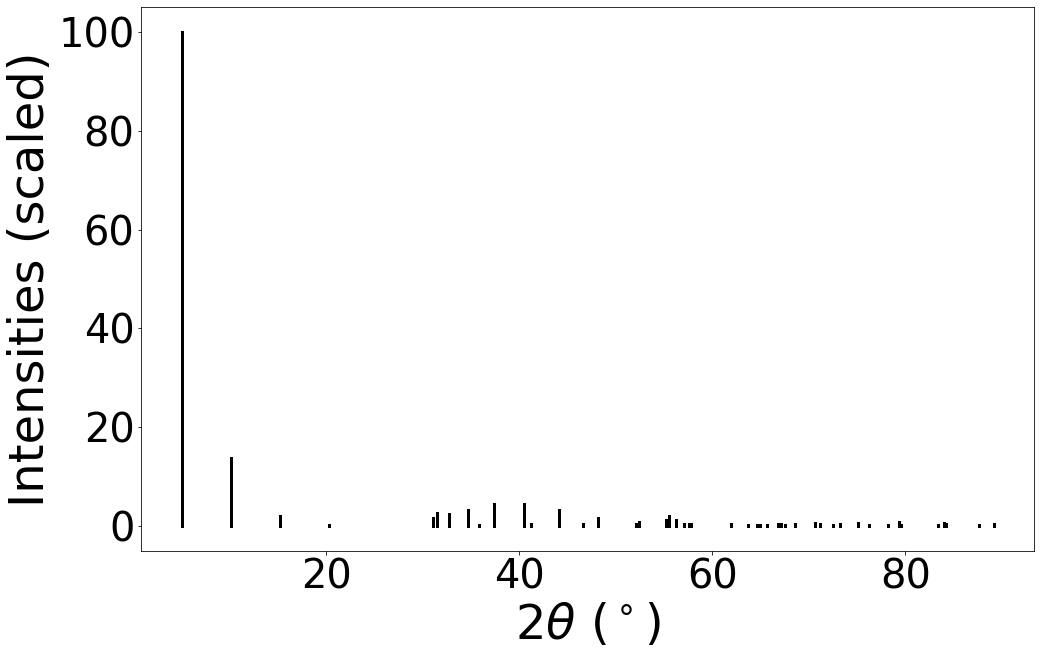

In [14]:
# Le plot du diffractogramme complet :
XRD.show_plot(structure, annotate_peaks = False)